In [4]:
%reload_ext autoreload
%autoreload 2
import main
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [40, 30]

In [6]:
import fastai as fai
from main import *

In [94]:
maxsize=100000
batch_size=512
indices = np.random.RandomState(seed=42).permutation(maxsize)

val_indices, train_indices = indices[:maxsize//10], indices[maxsize//10:]

In [95]:
train_dl = fai.basic_data.DataLoader(DatasetFromHdf5('data/train_dataset.h5', maxsize=len(train_indices)), 
                        batch_size=batch_size,
                        sampler=SubsetRandomSampler(train_indices),
                         num_workers=2)

In [96]:
val_dl = fai.basic_data.DataLoader(DatasetFromHdf5('data/train_dataset.h5', maxsize=len(val_indices)), 
                        batch_size=batch_size, 
                        sampler=SubsetRandomSampler(val_indices),
                         num_workers=2)

In [97]:
db = fai.basic_data.DataBunch(train_dl, val_dl)

In [98]:
input_size = train_dl.dataset.programs.shape[1] + 2*train_dl.dataset.schedules.shape[1] 
output_size = 1

In [99]:
m = Model(input_size, output_size)
criterion = nn.MSELoss()

In [100]:
l = fai.Learner(db, m, loss_func=criterion)

In [101]:
l.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


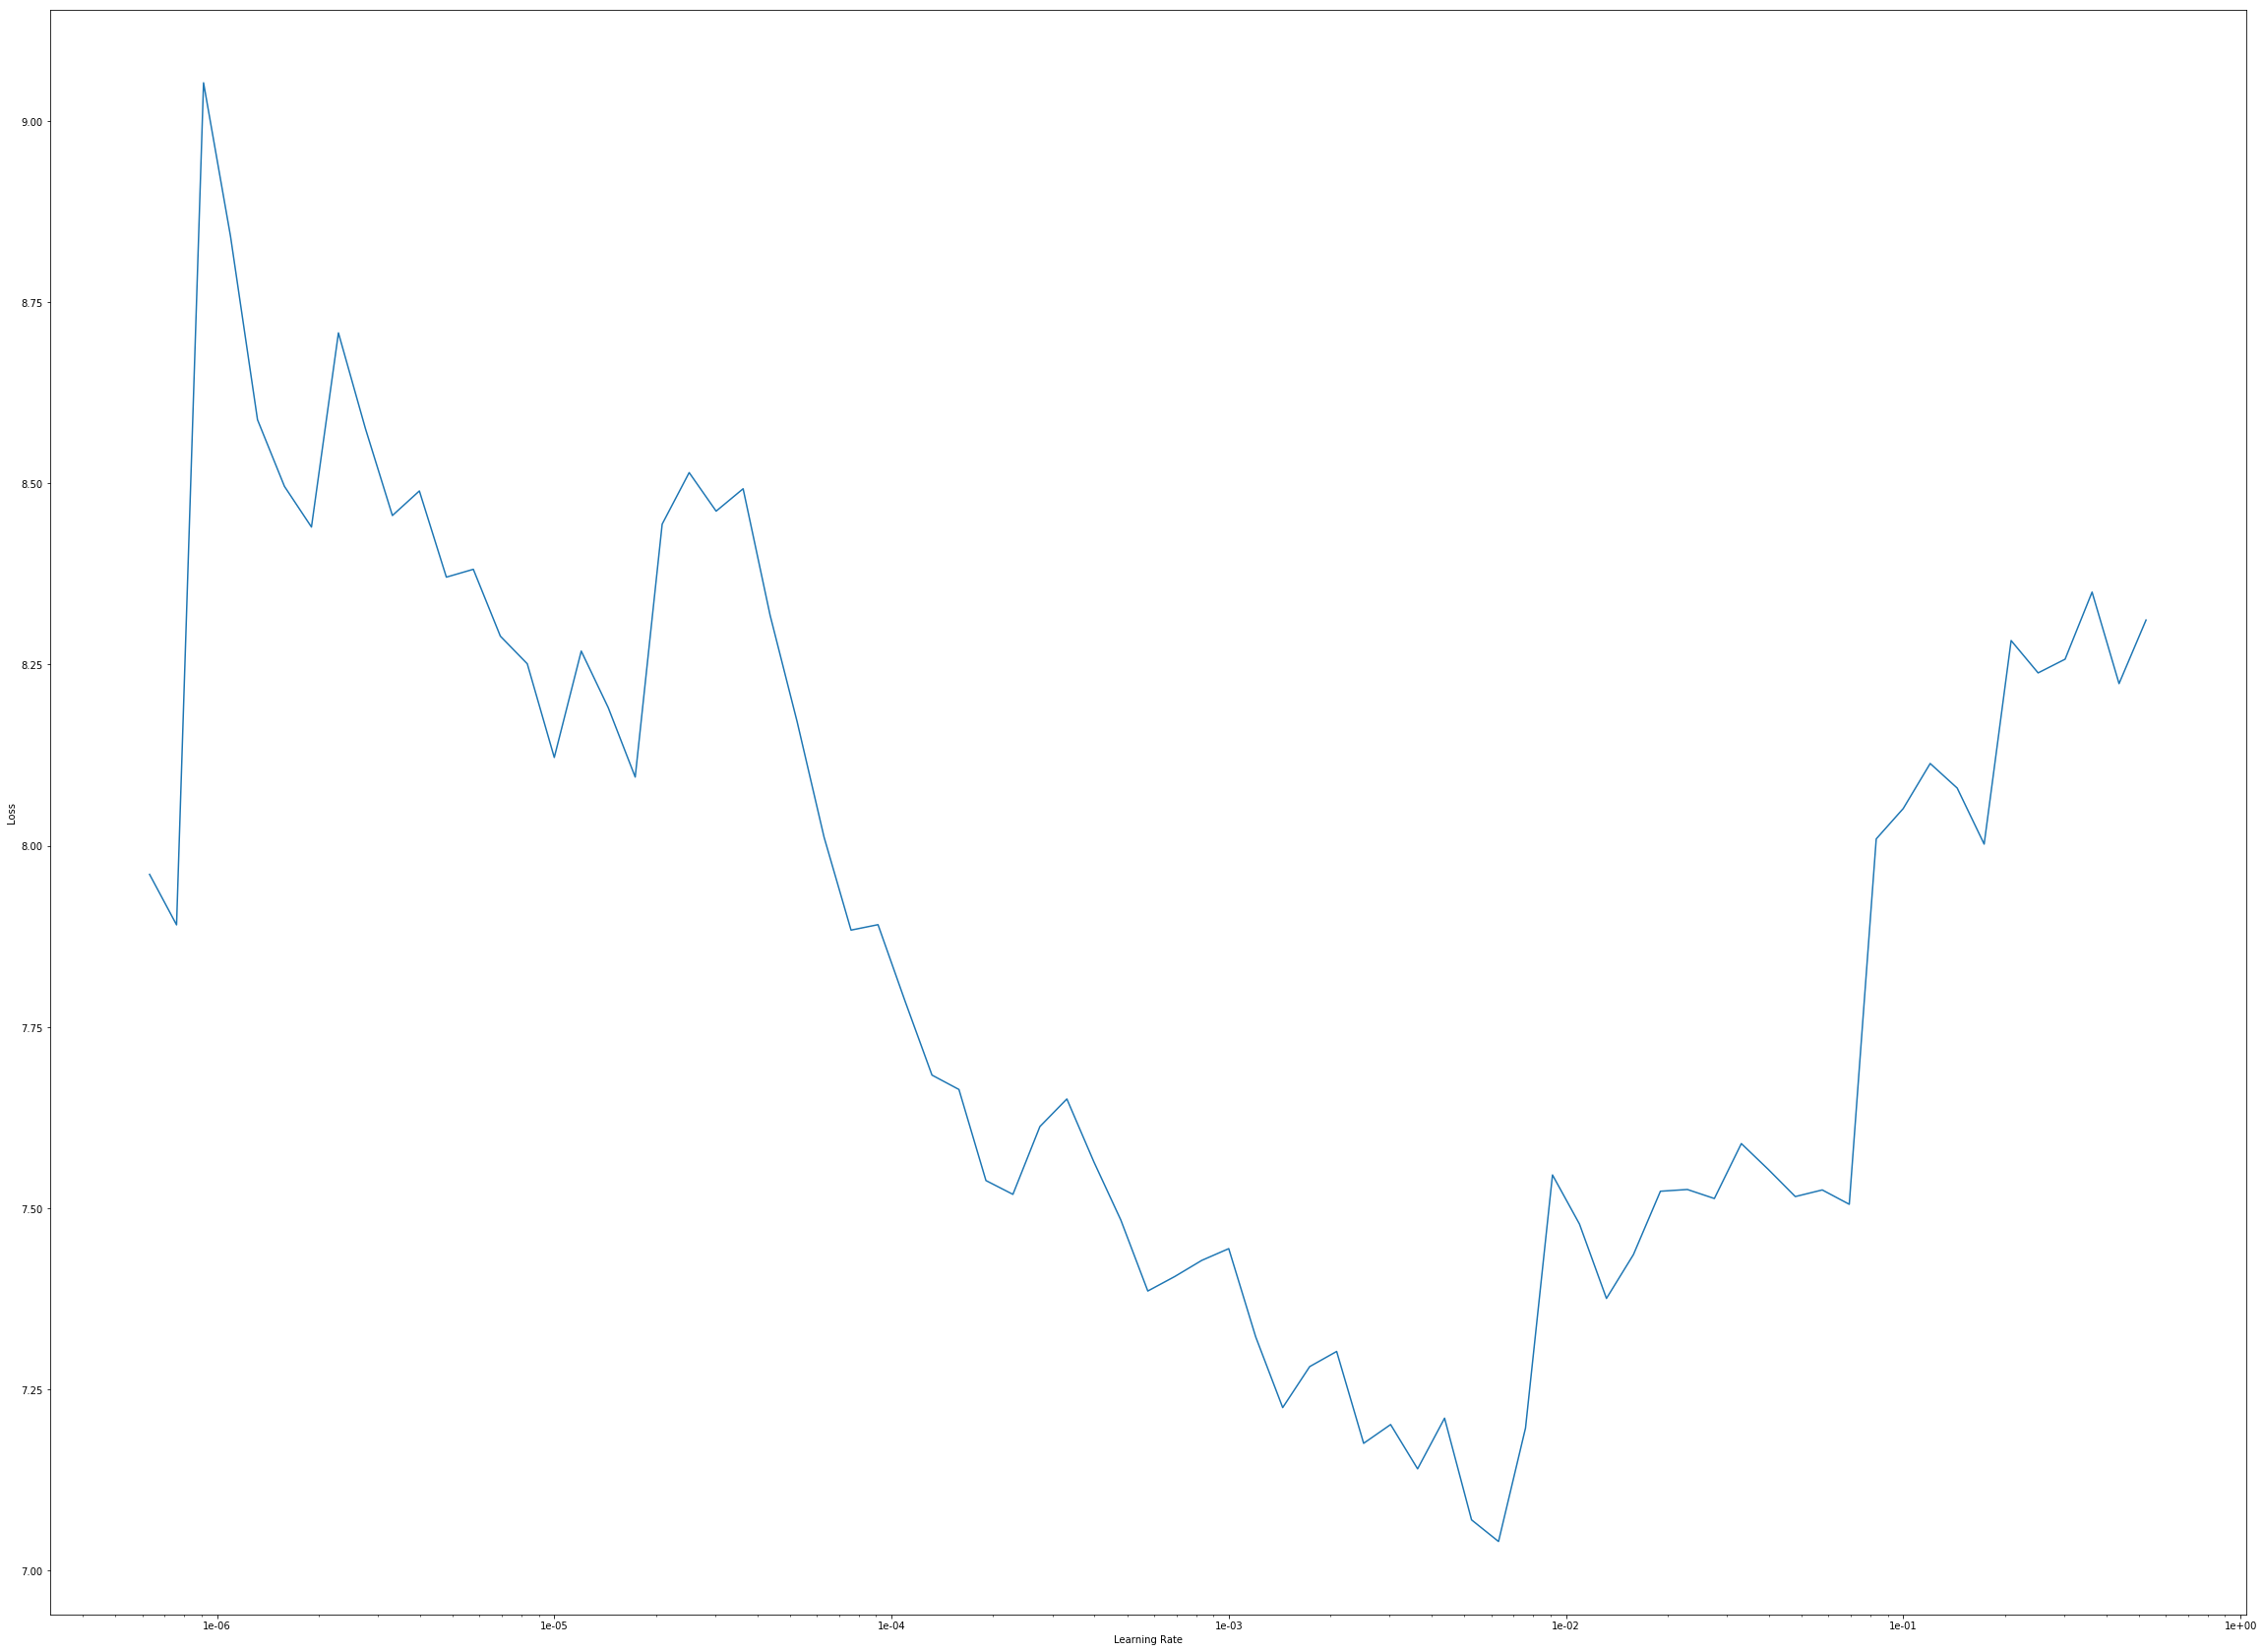

In [102]:
l.recorder.plot()

In [103]:
lr = 0.001

In [23]:
%load_ext line_profiler
%lprun 

In [ ]:
l.fit(1000, lr)

epoch,train_loss,valid_loss
1,5.899198,6.070301
2,6.175047,6.282885
3,5.741931,6.127903
4,5.883423,5.660659
5,4.953372,5.313233
6,5.371163,5.058182
7,5.284485,6.438532
8,5.388159,5.073066
9,5.288509,5.151852
10,5.146525,5.982287


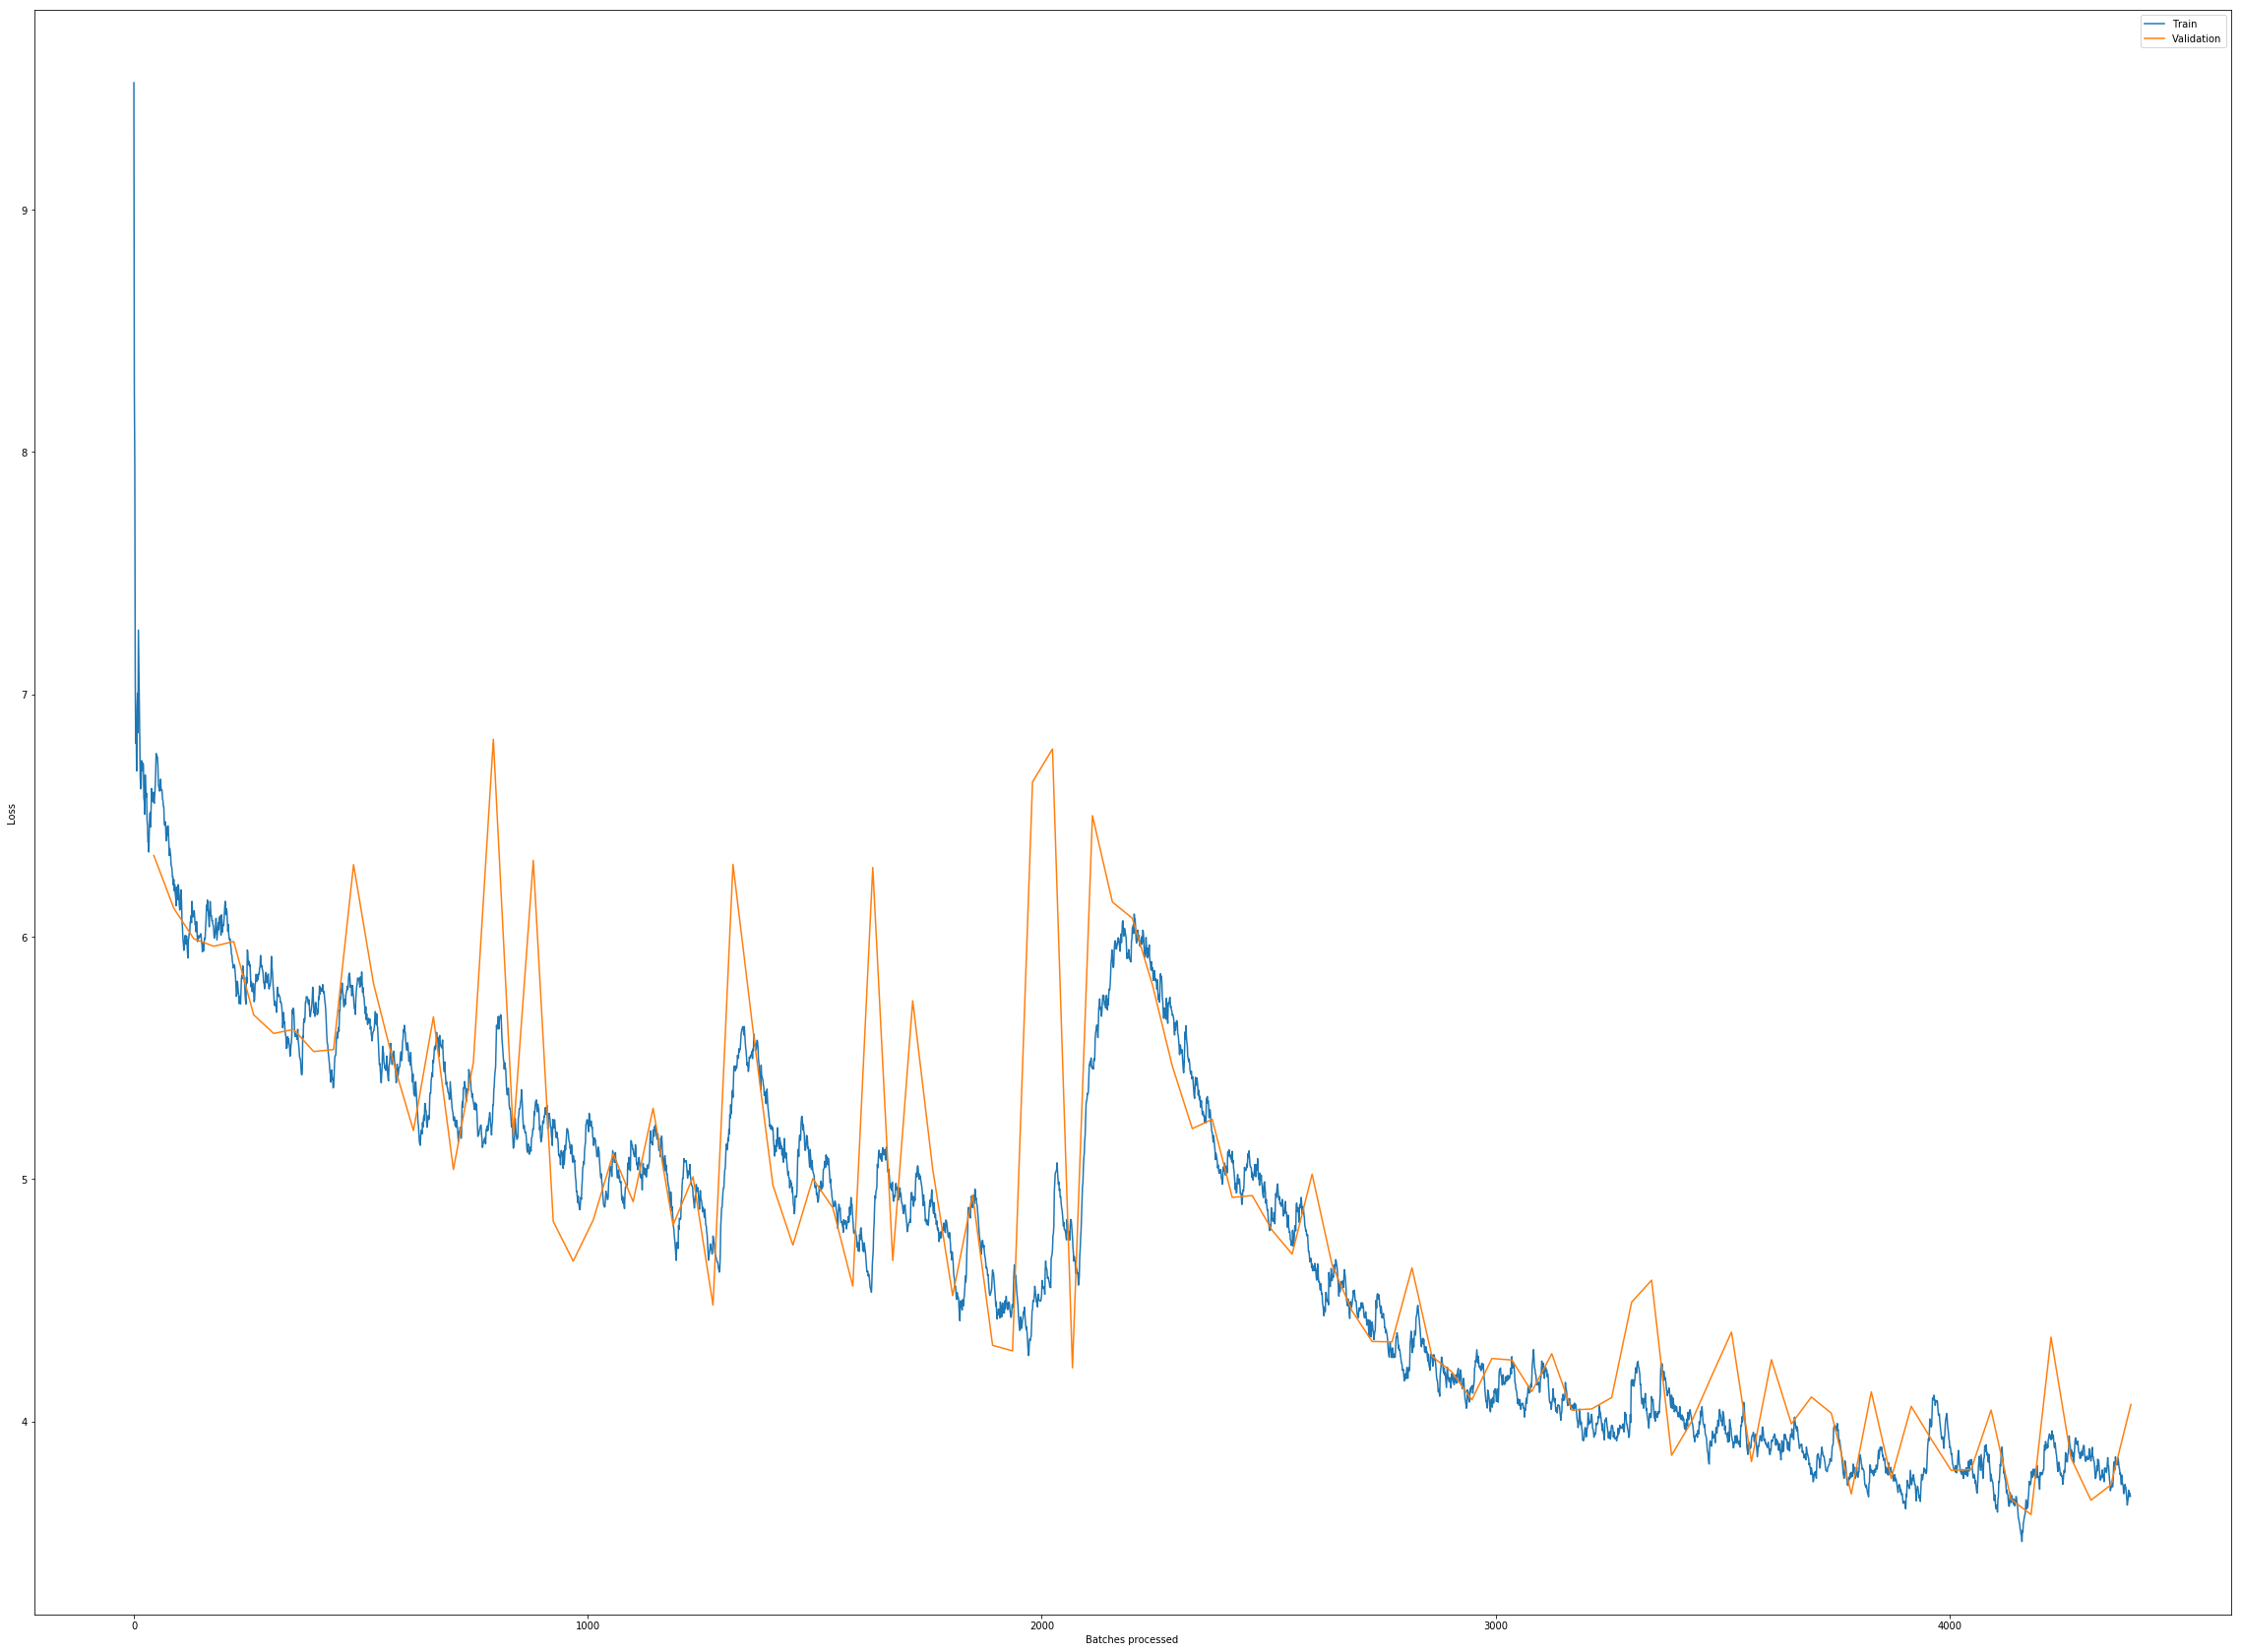

In [47]:
l.recorder.plot_losses()